## 2.5.3 共分散行列と誤差楕円

Text(0, 0.5, 'y')

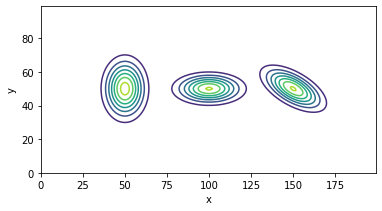

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import math

x,y=np.mgrid[0:200,0:100]
pos=np.empty(x.shape+(2,))
pos[:,:,0]=x
pos[:,:,1]=y

a=multivariate_normal(mean=[50,50],cov=[[50,0],[0,100]])
b=multivariate_normal(mean=[100,50],cov=[[125,0],[0,25]])
c=multivariate_normal(mean=[150,50],cov=[[100,-25*math.sqrt(3)],[-25*math.sqrt(3),50]])

for e in [a,b,c]:
    plt.contour(x,y,e.pdf(pos))

plt.gca().set_aspect("equal")# gca:図を管理しているAxisというオブジェクトを渡す
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("y")


上記図は平均と共分散行列を変化させたときのどうなるかを示したもの。

図を見ると、$\sigma_{x}^{2}, \sigma_{y}^{2}$の大きさが各軸の等高線の広がりに対応しており、共分散$\sigma_{xy}$に値があると等高線が回転することがわかる。

In [5]:
# ガウス分布の傾きについて調べて見る。
eig_vals, eig_vec = np.linalg.eig(c.cov)

print("eig_vals:", eig_vals)
print("eig_vec:", eig_vec)
print("固有ベクトル1:", eig_vec[:, 0])
print("固有ベクトル2:", eig_vec[:, 1])


eig_vals: [125.  25.]
eig_vec: [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
固有ベクトル1: [ 0.8660254 -0.5      ]
固有ベクトル2: [0.5       0.8660254]


固有値が$l_1=125,l_2=25$でそれぞれに対応する固有ベクトル$v_1=(\sqrt{3/2} -1/2)^T,v_{2}=(1/2 \sqrt{3/2})^T $となる。

この結果を使い、ベクトル$\sqrt{{l_1}{v_1}},\sqrt{{l_2}{v_2}}$をcの等高線上に描画してみる。ベクトルの始点は分布の中心とする。

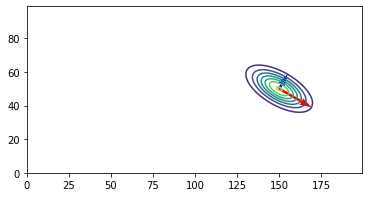

In [6]:
plt.contour(x, y, c.pdf(pos))

v = 2 * math.sqrt(eig_vals[0]) * eig_vec[:, 0]
plt.quiver(
    c.mean[0],
    c.mean[1],
    v[0],
    v[1],
    color="red",
    angles="xy",
    scale_units="xy",
    scale=1,
)

v = 2 * math.sqrt(eig_vals[1]) * eig_vec[:, 1]
plt.quiver(
    c.mean[0],
    c.mean[1],
    v[0],
    v[1],
    color="blue",
    angles="xy",
    scale_units="xy",
    scale=1,
)

plt.gca().set_aspect("equal")
plt.show()


4,7行目のquiverが矢印を書くためのメソッド。引数は順番に、始点の(x,y)座標、ベクトルの(x,y)座標での長さ。

ベクトルが小さく描かれてしまうため見えやすいように3、6行目で2倍の長さにしてる。